In [ ]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import statsmodels.api as sm

# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/covid_19_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

#clean
df.columns = df.columns.str.replace(' ', '_')
df['Last_Update'] = pd.to_datetime(df['Last_Update'], format='mixed') 
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

df.set_index('SNo', inplace=True)

df['Country/Region']= df['Country/Region'].fillna('else')
df['Province/State']= df['Province/State'].fillna('Unknown')

df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].clip(lower=0) 

In [2]:
corr = df[['Confirmed', 'Deaths', 'Recovered']].corr() # to get the corelation values between different variables
corr

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.888418,0.633497
Deaths,0.888418,1.000000,0.538431
Recovered,0.633497,0.538431,1.000000


<module 'matplotlib.pyplot' from 'd:\\anacoda\\envs\\data_env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

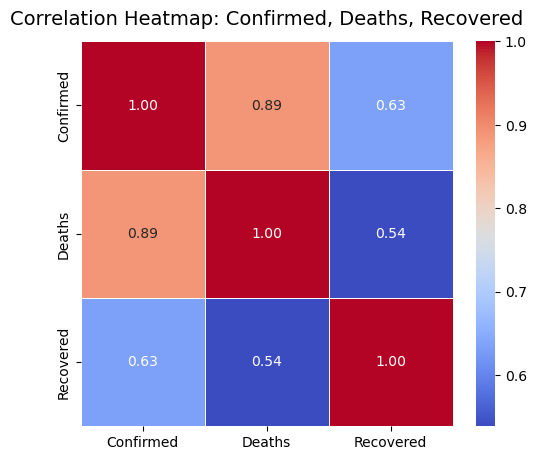

In [3]:
plt.figure(figsize=(6, 5))

sns.heatmap(
    corr,
    annot=True,          # shows the correlation values on the cells
    cmap='coolwarm',     # color palette (blue to red)
    fmt=".2f",           # format the numbers with 2 decimal places
    linewidths=0.5,      # thin lines between boxes
)

plt.title('Correlation Heatmap: Confirmed, Deaths, Recovered', fontsize=14, pad=12)
plt
